In [1]:
!pip install tensorflow matplotlib numpy


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense


In [3]:
# Vocabulary size (top words only)
max_features = 10000
maxlen = 200  # each review cut/padded to 200 words

print("Loading data...")
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

print(len(x_train), "train sequences")
print(len(x_test), "test sequences")

# Pad sequences to fixed length
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)


Loading data...
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
25000 train sequences
25000 test sequences


In [4]:
# Vocabulary size (top words only)
max_features = 10000
maxlen = 200  # each review cut/padded to 200 words

print("Loading data...")
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

print(len(x_train), "train sequences")
print(len(x_test), "test sequences")

# Pad sequences to fixed length
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)


Loading data...
25000 train sequences
25000 test sequences


In [5]:
model = Sequential()
model.add(Embedding(max_features, 128))        # word embeddings
model.add(SimpleRNN(128, dropout=0.2))         # Simple RNN
model.add(Dense(1, activation='sigmoid'))      # output layer (binary)

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [6]:
history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=5,
                    validation_data=(x_test, y_test))


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 98s 121ms/step - accuracy: 0.5384 - loss: 0.6872 - val_accuracy: 0.7583 - val_loss: 0.5289
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 88s 113ms/step - accuracy: 0.7564 - loss: 0.5167 - val_accuracy: 0.7844 - val_loss: 0.4991
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 88s 112ms/step - accuracy: 0.7911 - loss: 0.4540 - val_accuracy: 0.7668 - val_loss: 0.5078
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 89s 113ms/step - accuracy: 0.7864 - loss: 0.4592 - val_accuracy: 0.6814 - val_loss: 0.5928
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 141s 113ms/step - accuracy: 0.8269 - loss: 0.3926 - val_accuracy: 0.7569 - val_loss: 0.5137


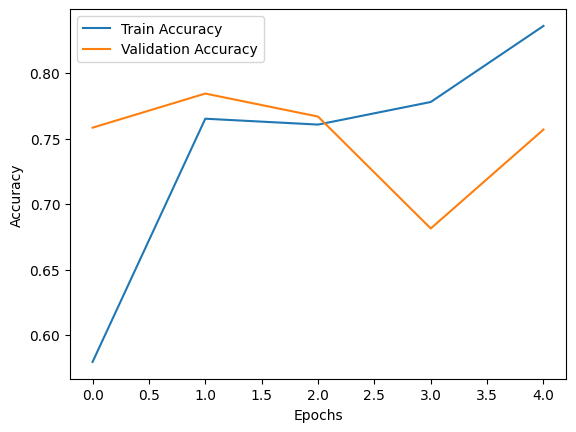

In [7]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [10]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

# Load word index from IMDB
word_index = imdb.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}

# Function to encode user review into integer sequence
def encode_review(text, word_index, maxlen=200):
    words = text.lower().split()
    encoded = []
    for word in words:
        index = word_index.get(word)
        if index is not None and index < 10000:  # keep only top words
            encoded.append(index + 3)  # +3 offset for reserved indices
        else:
            encoded.append(2)  # 2 = "unknown"
    return sequence.pad_sequences([encoded], maxlen=maxlen)

# ---- Take input from user ----
user_review = input("Enter your movie review: ")

# Preprocess the input review
processed_review = encode_review(user_review, word_index, maxlen=200)

# Predict sentiment
prediction = model.predict(processed_review)[0][0]

print("\nYour Review:", user_review)
print("Prediction:", "Positive 😀" if prediction > 0.5 else "Negative 😞")
print("Confidence Score:", prediction)


Enter your movie review: I sure would like to see a resurrection of a up dated Seahunt series with the tech they have today i...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step

Your Review: I sure would like to see a resurrection of a up dated Seahunt series with the tech they have today i...
Prediction: Positive 😀
Confidence Score: 0.796815


In [11]:
# Train the model
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=5,
    validation_data=(x_test, y_test)
)

# Evaluate on test set
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 60s 152ms/step - accuracy: 0.8513 - loss: 0.3631 - val_accuracy: 0.7214 - val_loss: 0.5663
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 60s 153ms/step - accuracy: 0.8564 - loss: 0.3476 - val_accuracy: 0.7187 - val_loss: 0.5582
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 80s 149ms/step - accuracy: 0.8689 - loss: 0.3324 - val_accuracy: 0.7423 - val_loss: 0.5399
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 59s 151ms/step - accuracy: 0.8889 - loss: 0.2782 - val_accuracy: 0.8182 - val_loss: 0.4926
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 58s 150ms/step - accuracy: 0.9123 - loss: 0.2340 - val_accuracy: 0.7985 - val_loss: 0.5306
Test Accuracy: 79.85%
